# Ejercicio N°1
##### Nombre: Bastián Gómez Calderón
##### Fecha: 06-10-2021

**INSTRUCCIONES:**
1. Crear una carpeta nueva en su repositorio git con el nombre E1 (0.2 pto)
2. Dentro de E1 crear una carpeta que se llame data. (0.2 pto)
3. Guardar los datos asignados en esa carpeta. (0.2 pto)
4. Dentro de E1 debera crear un Jupyter Notebook llamado E1. (0.2 pto)
5. En el Jupyter Notebook, configurar la primera casilla en Lenguaje Markdown y escribir su nombre, fecha, y esta lista de instrucciones de forma ordenada. (0.2 pts)
6. Importar la libreria csv y matplotlib.pyplot de python para poder procesar y graficar los datos del archivo. Debe separar el código en las casillas que estime conveniente, pero se solicita minimo que en una casilla esten solo las importaciones, en otra solo la lectura de los datos y otra con los plots, además cada casilla debe tener una casilla previa que describa el código en formato markdown. (2 pts)
7. Hacer los gráficos correspondientes al conjunto de datos seleccionado. (1 pts)
8. Utilizar los comandos adecuados de git para actualizar su repositorio y dejarlo disponible en github de forma pública.          (1 pts)
9. Crear su perfil web de github siguiendo este tutorial oficial, sino quiere crearlo sobre ud, puede crearlo sobre algun tema de interés. (1 pts)

    NOTA= PUNTAJE + 1
    
### Graficar
1. Casos Confirmados por Región, es decir la suma por comuna, en el tiempo.
2. Casos confirmados, pero el acumulado.

**A continuación se presenta el desarrollo del ejercicio:**

*Manejo de los datos:*

In [50]:
#En primer lugar importamos las librerías necesarias para el desarrollo "csv", "matplotlib" y "numpy"

In [99]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [216]:
#Definimos una variable para almacenar los datos a utilizar
contagios = {}
se = []
#Se repite regiones así que lo utilizamos como diccionario
regiones = {} 
# Leemos el archivo de estudio correspondiente, almacenado en la carpeta data
bandera=1
with open('data/CasosConfirmadosPorComuna.csv') as casos:
    lector = csv.reader(casos, delimiter=',')
    for columna in lector:
        if bandera==1:
            for elemento in columna:
                if '202' in elemento:
                    se.append(elemento)
                    contagios[elemento]={}
            bandera=0
        else:
            region=columna.pop(0)
            columna.pop(0)
            columna.pop(0)
            columna.pop(0)
            columna.pop(0)
            regiones[region]=1
            for contador in range(len(se)):
                try:
                    contagios[se[contador]][region]+=float(columna[contador])
                except KeyError:
                    contagios[se[contador]][region]=float(columna[contador])
        

In [217]:
contagios

{'202007': {'Antofagasta': 0.0,
  'AraucanÃ\xada': 0.0,
  'Arica y Parinacota': 0.0,
  'Atacama': 0.0,
  'AysÃ©n': 0.0,
  'BiobÃ\xado': 0.0,
  'Coquimbo': 0.0,
  'Los Lagos': 0.0,
  'Los RÃ\xados': 0.0,
  'Magallanes': 0.0,
  'Maule': 0.0,
  'Metropolitana': 0.0,
  'Oâ€™Higgins': 0.0,
  'TarapacÃ¡': 0.0,
  'ValparaÃ\xadso': 0.0,
  'Ã‘uble': 0.0},
 '202008': {'Antofagasta': 0.0,
  'AraucanÃ\xada': 0.0,
  'Arica y Parinacota': 0.0,
  'Atacama': 0.0,
  'AysÃ©n': 0.0,
  'BiobÃ\xado': 0.0,
  'Coquimbo': 0.0,
  'Los Lagos': 0.0,
  'Los RÃ\xados': 0.0,
  'Magallanes': 0.0,
  'Maule': 0.0,
  'Metropolitana': 1.0,
  'Oâ€™Higgins': 0.0,
  'TarapacÃ¡': 0.0,
  'ValparaÃ\xadso': 0.0,
  'Ã‘uble': 0.0},
 '202009': {'Antofagasta': 2.0,
  'AraucanÃ\xada': 0.0,
  'Arica y Parinacota': 0.0,
  'Atacama': 0.0,
  'AysÃ©n': 0.0,
  'BiobÃ\xado': 0.0,
  'Coquimbo': 0.0,
  'Los Lagos': 0.0,
  'Los RÃ\xados': 0.0,
  'Magallanes': 0.0,
  'Maule': 1.0,
  'Metropolitana': 14.0,
  'Oâ€™Higgins': 0.0,
  'TarapacÃ¡': 

###### *Gráfica N°1: Casos Confirmados por Región, es decir la suma por comuna, en el tiempo.*

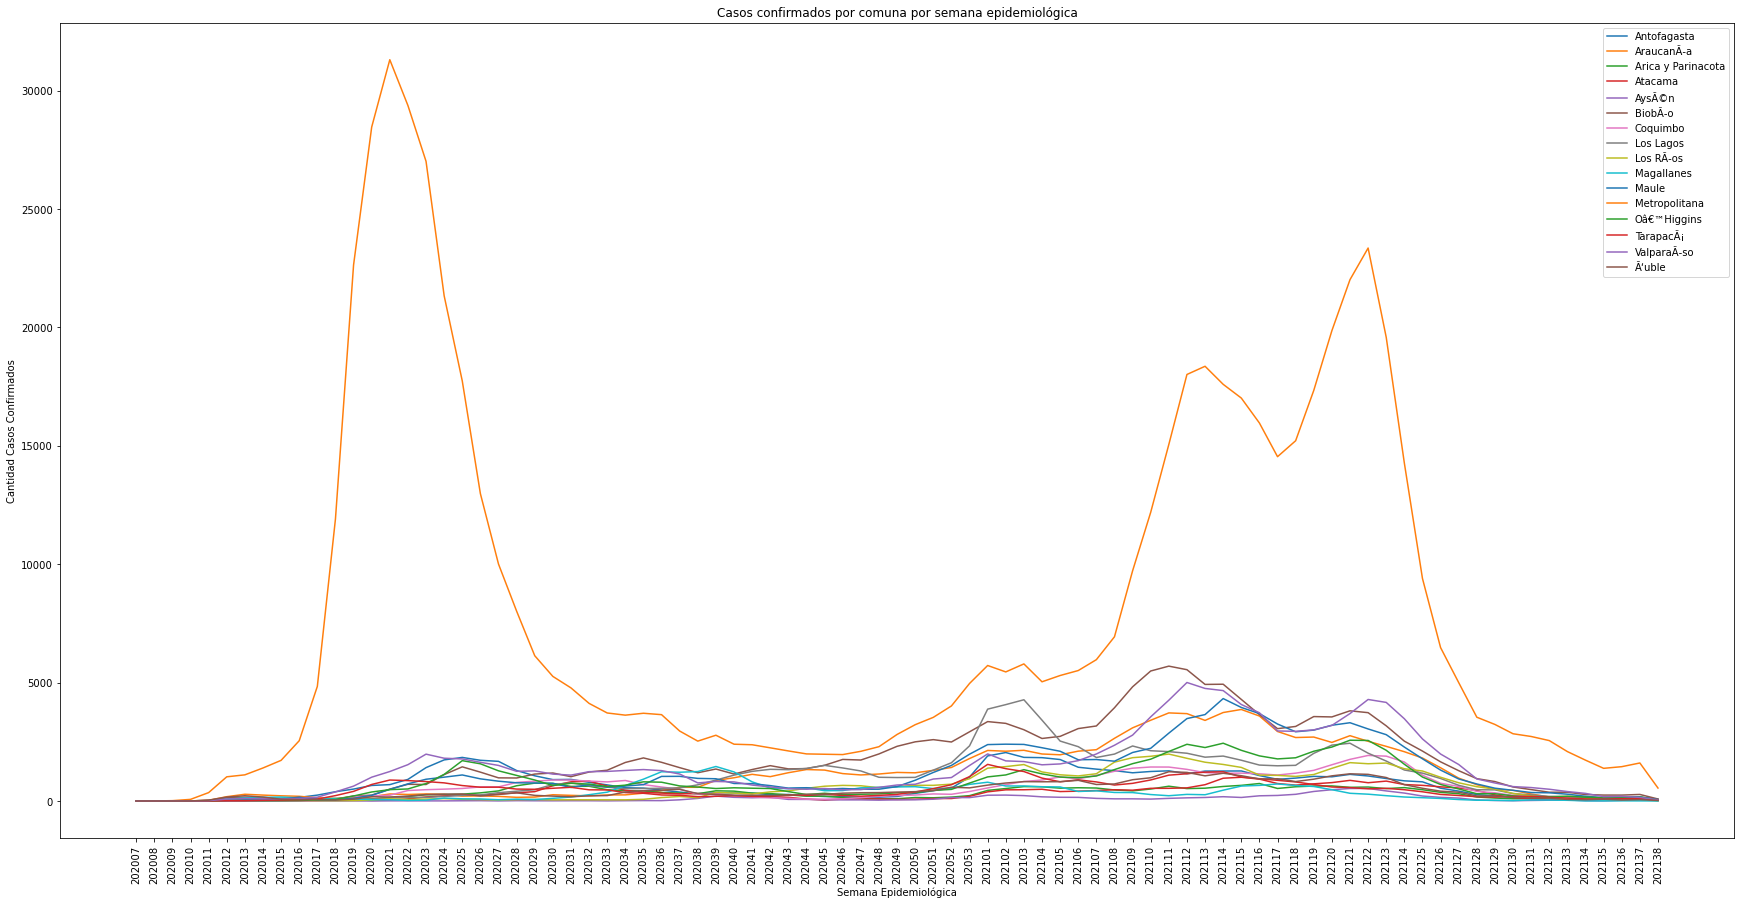

In [57]:
#Realizamos la construcción de la gráfica
fig, ax = plt.subplots(figsize=(30,15))
ax.set_xticks(ejeX)
ax.set_xticklabels(se,rotation=90)

#Generamos una lista con los valores de los casos por comuna
casos={}

for region in regiones:
    casos[region]=[]
for semana in se:
    for region in regiones:
        casos[region].append(contagios[semana][region])
        
#Definimos la posición de las etiquetas y ancho de estás  
for region in regiones:
    ax.plot(casos[region],label=region)
    
ejeX= np.arange(len(se))
#Pondremos nombre a nuestro eje "X"
ax.set_xlabel('Semana Epidemiológica')
#Colocamos título
ax.set_title('Casos confirmados por comuna por semana epidemiológica')
ax.set_ylabel("Cantidad Casos Confirmados")
ax.legend()


